In [17]:
using MLDatasets
train_data = MLDatasets.MNIST.traindata(Float64)

train_imgs = train_data[1]
@show typeof(train_imgs)
@show size(train_imgs)

train_labels = train_data[2]
@show typeof(train_labels);

typeof(train_imgs) = Array{Float64, 3}
size(train_imgs) = (28, 28, 60000)
typeof(train_labels) = Vector{Int64}


In [18]:
train_imgs

28×28×60000 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0    

In [19]:
train_labels

60000-element Vector{Int64}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4
 3
 5
 3
 ⋮
 7
 8
 9
 2
 9
 5
 1
 8
 3
 5
 6
 8

In [20]:
length(train_data)

2

In [2]:
test_data = MLDatasets.MNIST.testdata(Float64)
test_imgs = test_data[1]
test_labels = test_data[2]
@show size(test_imgs);

size(test_imgs) = (28, 28, 10000)


In [3]:
n_train, n_test = length(train_labels), length(test_labels)

(60000, 10000)

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423
┌ Warning: Keyword argument widen not supported with Plots.GRBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, connections, contour_labels, discrete_values, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, html_output_format, inset_subplots, label, layout, left_margin, legend_background_color, legend_font_color, legend_font_family, legend_font_halign, legend_font_po

The first 12 digits: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5]


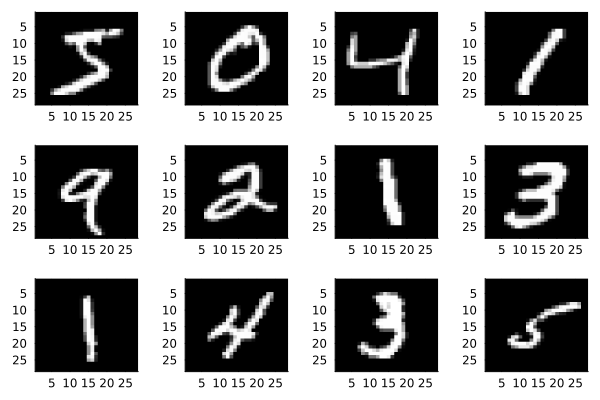

In [4]:
using Plots, Measures, LaTeXStrings
println("The first 12 digits: ", train_labels[1:12])
plot([heatmap(train_data[1][:,:,k]',
            yflip=true,legend=false,c=cgrad([:black, :white])) for k in 1:12]...)

size(X) = (60000, 784)


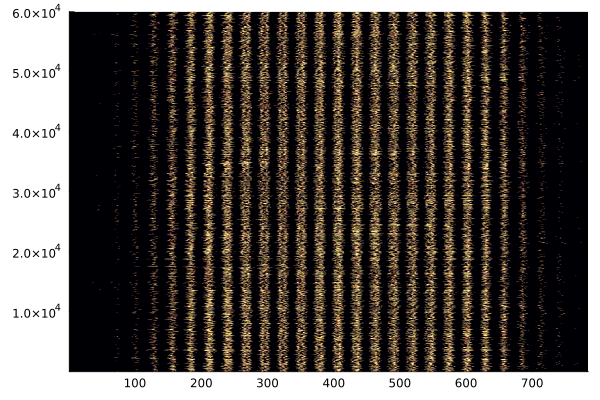

In [5]:
X = vcat([vec(train_imgs[:,:,k])' for k in 1:n_train]...)
@show size(X)
heatmap(X, legend=false)

In [22]:
A = [ones(n_train) X];

In [23]:
using LinearAlgebra
Adag = pinv(A);
@show size(Adag);

size(Adag) = (785, 60000)


In [24]:
using Flux: onehotbatch

tfPM(x) = x ? +1 : -1
yDat(k) = tfPM.(onehotbatch(train_labels,0:9)'[:,k+1])
bets = [Adag*yDat(k) for k in 0:9]; #this is the trained model (a list of 10 beta coeff vectors)

In [25]:
linear_classify(square_image) = argmax([([1 ; vec(square_image)])'*bets[k] for k in 1:10])-1

linear_classify (generic function with 1 method)

In [26]:
predictions = [linear_classify(test_imgs[:,:,k]) for k in 1:n_test]
confusionMatrix = [sum((predictions .== i) .& (test_labels .== j)) for i in 0:9, j in 0:9]
acc = sum(diag(confusionMatrix))/n_test

println("Accuracy: ", acc, "\nConfusion Matrix:")
show(stdout, "text/plain", confusionMatrix)

Accuracy: 0.8603
Confusion Matrix:
10×10 Matrix{Int64}:
 944     0   18    4    0   23   18    5   14   15
   0  1107   54   17   22   18   10   40   46   11
   1     2  813   23    6    3    9   16   11    2
   2     2   26  880    1   72    0    6   30   17
   2     3   15    5  881   24   22   26   27   80
   7     1    0   17    5  659   17    0   40    1
  14     5   42    9   10   23  875    1   15    1
   2     1   22   21    2   14    0  884   12   77
   7    14   37   22   11   39    7    0  759    4
   1     0    5   12   44   17    0   50   20  801

In [28]:
argmax([2,4,8,-3])

3

In [27]:
using Flux, Statistics, Random, StatsBase, Plots
using Flux: params, onehotbatch, crossentropy, update!
Random.seed!(0)

X_test = vcat([vec(test_imgs[:,:,k])' for k in 1:n_test]...)

logistic_softmax_predict(img_vec, W, b) = softmax(W*img_vec .+ b)
logistic_sofmax_classifier(img_vec, W, b) = argmax(logistic_softmax_predict(img_vec, W, b)) - 1


function train_softmax_logistic(;mini_batch_size = 1000)
    
    #Initilize parameters
    W = randn(10,28*28)
    b = randn(10)

    opt = ADAM(0.01)
    loss(x, y) = crossentropy(logistic_softmax_predict(x, W, b), onehotbatch(y,0:9))

    loss_value = 0.0
    epoch_num = 0

    #Training loop
    while true
        prev_loss_value = loss_value
        
        #Loop over mini-batches in epoch
        start_time = time_ns()
        for batch in Iterators.partition(1:n_train, mini_batch_size)
            gs = gradient(()->loss(X'[:,batch], train_labels[batch]), params(W,b))
            for p in (W,b)
                update!(opt, p, gs[p])
            end
        end
        end_time = time_ns()

        #record/display progress
        epoch_num += 1
        loss_value = loss(X', train_labels)
        println("Epoch = $epoch_num ($(round((end_time-start_time)/1e9,digits=2)) sec) Loss = $loss_value")
        
        if epoch_num == 1 || epoch_num % 5 == 0 
            acc = mean([logistic_sofmax_classifier(X_test'[:,k], W, b) for k in 1:n_test] .== test_labels)
            println("\tValidation accuracy: $acc") 
            
            #Stopping criteria
            abs(prev_loss_value-loss_value) < 1e-3 && break
        end
    end
    return W, b
end

# Train model parameters
W, b = train_softmax_logistic();

Epoch = 1 (5.41 sec) Loss = 1.5558745308581823
	Validation accuracy: 0.7079
Epoch = 2 (4.78 sec) Loss = 0.9157372508918367
Epoch = 3 (4.34 sec) Loss = 0.7109639372746402
Epoch = 4 (4.42 sec) Loss = 0.6054271538755294
Epoch = 5 (4.36 sec) Loss = 0.5397156844845997
	Validation accuracy: 0.8744
Epoch = 6 (4.57 sec) Loss = 0.49402379669684787
Epoch = 7 (4.37 sec) Loss = 0.45987122954745197
Epoch = 8 (4.37 sec) Loss = 0.4330578113859848
Epoch = 9 (4.4 sec) Loss = 0.4112794620009553
Epoch = 10 (4.41 sec) Loss = 0.39316309233748165
	Validation accuracy: 0.8966
Epoch = 11 (4.89 sec) Loss = 0.37783240838239834
Epoch = 12 (4.52 sec) Loss = 0.36466710604462244
Epoch = 13 (4.97 sec) Loss = 0.3532116264199913
Epoch = 14 (5.07 sec) Loss = 0.343128181410476
Epoch = 15 (4.72 sec) Loss = 0.3341673396624744
	Validation accuracy: 0.9069
Epoch = 16 (4.89 sec) Loss = 0.3261454614467481
Epoch = 17 (4.76 sec) Loss = 0.3189246447692079
Epoch = 18 (4.97 sec) Loss = 0.3123975579557218
Epoch = 19 (4.54 sec) Loss